In [53]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [54]:
from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Load pre-trained model and tokenizer. This model has 12 attention heads
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

In [56]:
# Input sentence
sentence = "He works at apple and eats an apple every day."
inputs = tokenizer(sentence, return_tensors='pt')

# Run the model and get output and attention scores
outputs = model(**inputs)
attentions = output.attentions

In [57]:
# Extract last layers attention scores
last_layer_attention = attentions[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
num_heads = last_layer_attention.shape[1]

# Convert attention and tokens to numpy arrays
head_0 = last_layer_attention[0, 0].detach().numpy()
avg_attention = last_layer_attention[0].mean(dim=0).detach().numpy()

In [58]:
# Remove [CLS] and [SEP] tokens
tokens_cleaned = tokens[1: -1]
head_0_cleaned = head_0[1: -1, 1: -1]
avg_attention_cleaned = avg_attention[1: -1, 1: -1]

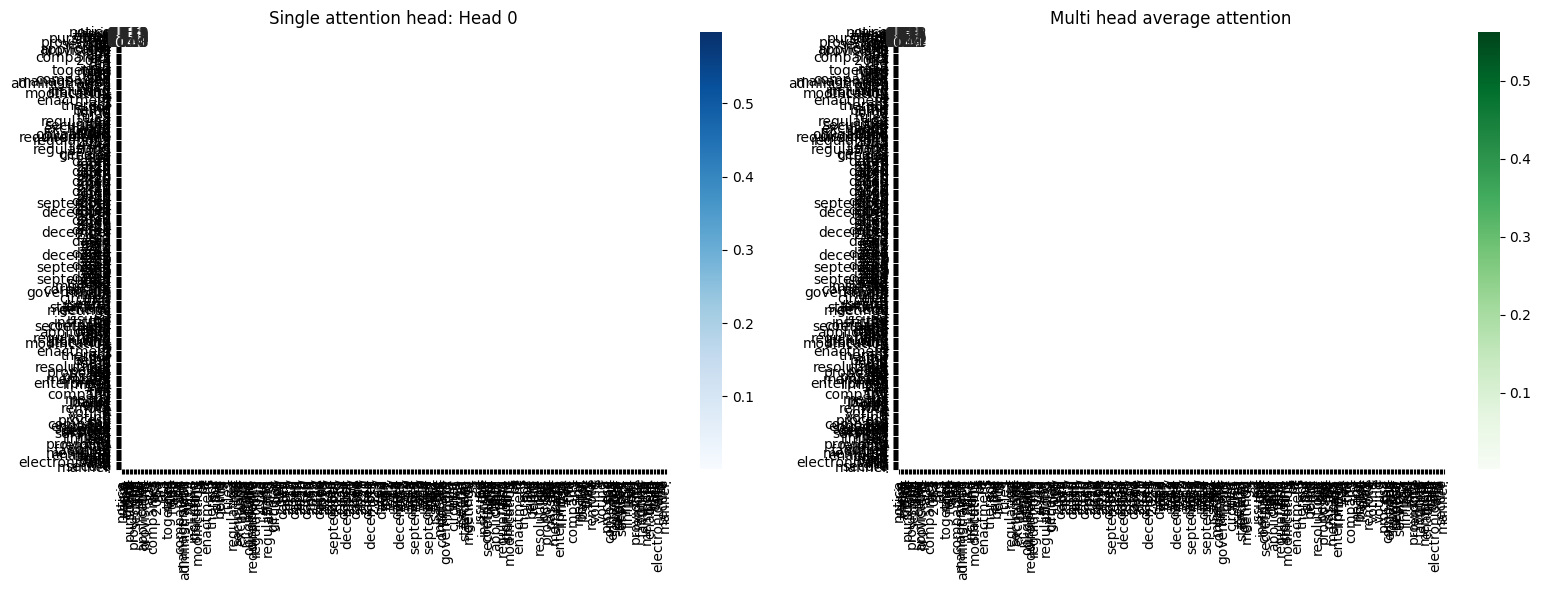

In [59]:
# Set up side by side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for single head (Head_0)
sns.heatmap(head_0_cleaned, xticklabels=tokens_cleaned, yticklabels=tokens_cleaned, cmap="Blues", annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Single attention head: Head 0")

# Heatmap for average attention
sns.heatmap(avg_attention_cleaned, xticklabels=tokens_cleaned, yticklabels=tokens_cleaned, cmap="Greens", annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Multi head average attention")

plt.tight_layout()
plt.show()